     proportion  total_budget  school_awareness  media_awareness  clean_air  \
0      0.004197        139000             41000            18000      21000   
1      0.002172        220000             74000            30000      50000   
2      0.002044        160000             26000            29000      41000   
3      0.002609        161000             50000            10000      33000   
4      0.002153        130000              8000             3000      37000   
..          ...           ...               ...              ...        ...   
147    0.008729        209000             41000            14000      69000   
148    0.001014        109000             19000            10000      20000   
149    0.006545        201000             55000            50000      18000   
150    0.005083        470000             76000            67000     128000   
151    0.006667        140000             32000            37000       5000   

     clean_env  health_training  sub_counselling  


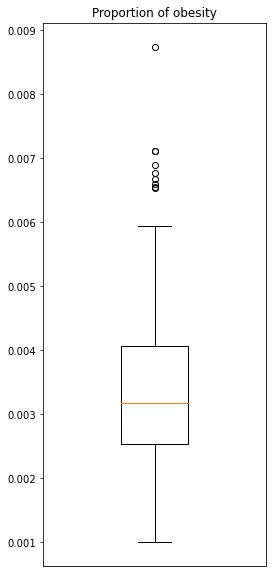

In [75]:
from pandas import read_csv
import matplotlib.pyplot as plt
import numpy as np

#import data
filename = 'obesity.csv'

names = ['proportion','total_budget','school_awareness','media_awareness','clean_air','clean_env','health_training','sub_counselling']   

data = read_csv(filename, names=names)

print(data)

output_filename = 'boxplot.png'

figure_width, figure_height = 4,10

plt.figure(figsize=(figure_width,figure_height))

plt.xlim([0.75,1.25])
plt.xticks([])
plt.boxplot(data.proportion, manage_ticks=(False))
plt.title('Proportion of obesity')
plt.savefig(output_filename)



In [76]:
import seaborn as sns
import pandas as pd
y= pd.DataFrame(y_values,columns=['dis_num'])
iqr= y.quantile(0.75) - y.quantile(0.25)
val_low= y.quantile(0.25)- 1.5*iqr
val_up= y.quantile(0.75)+1.5*iqr
rule_low=(y < val_low)
rule_up=(y > val_up)
print(np.sum(rule_low))
print(np.sum(rule_up))
print(rule_up)
rule_up[rule_up['dis_num'].isin([True])]

dis_num    0
dtype: int64
dis_num    9
dtype: int64
     dis_num
0      False
1      False
2      False
3      False
4      False
..       ...
147     True
148    False
149     True
150    False
151     True

[152 rows x 1 columns]


,dis_num
7,True
91,True
92,True
106,True
111,True
144,True
147,True
149,True
151,True


In [87]:
data_new=data.drop([7,91,92,106,111,144,147,149,151],axis=0)
print(data_new)


     proportion  total_budget  school_awareness  media_awareness  clean_air  \
0      0.004197        139000             41000            18000      21000   
1      0.002172        220000             74000            30000      50000   
2      0.002044        160000             26000            29000      41000   
3      0.002609        161000             50000            10000      33000   
4      0.002153        130000              8000             3000      37000   
..          ...           ...               ...              ...        ...   
143    0.002764        200000             36000            17000      16000   
145    0.002902        380000            125000            29000      11000   
146    0.003453        110000             11000            12000      33000   
148    0.001014        109000             19000            10000      20000   
150    0.005083        470000             76000            67000     128000   

     clean_env  health_training  sub_counselling  


In [91]:
import statsmodels.api as sms
import numpy as np
from matplotlib.pyplot import MultipleLocator


output_filename = 'regression_figure.png'
y_values = data_new.proportion
x_values = data_new[['total_budget','school_awareness','media_awareness','clean_air','clean_env','health_training','sub_counselling']]
# These lines perform the regression procedure:
X_values = sms.add_constant(x_values)
regression_model_a = sms.OLS(y_values, X_values)
regression_model_b = regression_model_a.fit()
# and print a summary of the results:
print(regression_model_b.summary())
print() # blank line

# Now we store all the relevant values:
predictor_coeffs  = regression_model_b.params[1:]
constant          = regression_model_b.params[0] # called the 'intercept' in simple regression
Rsquared          = regression_model_b.rsquared
MSE               = regression_model_b.mse_resid
pvalues_T         = regression_model_b.pvalues[1:]
pvalue_F          = regression_model_b.f_pvalue
gradient_x2  = regression_model_b.params[2]



# Note that predictor_coeffs is a list of the best-fit coefficients for x1, x2, x3, ...
# Similarly, pvalues_T is a list of the p-values associated with each of these variables in turn.

# Print these summary stats:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)



                            OLS Regression Results                            
Dep. Variable:             proportion   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.098
Date:                Fri, 12 Nov 2021   Prob (F-statistic):              0.367
Time:                        21:11:25   Log-Likelihood:                 777.48
No. Observations:                 143   AIC:                            -1541.
Df Residuals:                     136   BIC:                            -1520.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0032      0.000  

E:\miniconda\envs\my_conda_env_py38\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [92]:
print("predictor coefficients =", predictor_coeffs)
print("constant               =", constant)
print("Rsquared               =", Rsquared)
print("MSE                    =", MSE)
print("T-test pvalues         =", pvalues_T)
print("F-test pvalue          =", pvalue_F)


predictor coefficients = total_budget        8.358334e-10
school_awareness   -6.650518e-09
media_awareness     3.089955e-09
clean_air           2.098478e-09
clean_env          -1.613479e-10
health_training    -4.863080e-09
sub_counselling     7.322473e-09
dtype: float64
constant               = 0.0031540527307202773
Rsquared               = 0.04620093806939174
MSE                    = 1.1665070279497166e-06
T-test pvalues         = total_budget        0.331159
school_awareness    0.026212
media_awareness     0.535777
clean_air           0.530090
clean_env           0.954403
health_training     0.435529
sub_counselling     0.363041
dtype: float64
F-test pvalue          = 0.3668214433066397


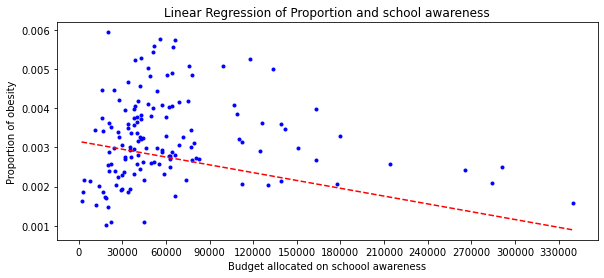

In [90]:
# This line creates the endpoints of the best-fit line:
x2_values = data_new.school_awareness
x_lobf = [min(x2_values),max(x2_values)]
y_lobf = [x_lobf[0]*gradient_x2 + constant,x_lobf[1]*gradient_x2 + constant]

# This line creates the figure. 
plt.figure(figsize=(figure_width,figure_height))

# The next lines create and save the plot:
plt.plot(x2_values,y_values,'b.',x_lobf,y_lobf,'r--' )
plt.title('Linear Regression of Proportion and school awareness')
plt.xlabel('Budget allocated on schoool awareness')
plt.ylabel('Proportion of obesity')
x_locator=MultipleLocator(30000)
ax=plt.gca()
ax.xaxis.set_major_locator(x_locator)
maxsize=4
m=0.2
N=len(x2_values)
s=maxsize/plt.gcf().dpi*N+2*m
margin=m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s,plt.gcf().get_size_inches()[0])
plt.savefig(output_filename)
